In [53]:
# Dependecy
# !pip install pillow
# !pip install langchain-community

# Links:-
# langchain_doc:- https://python.langchain.com/docs/integrations/llms/ollama/
# ollama:- https://ollama.com/


### As Text Model

In [37]:
from langchain_community.llms import Ollama

llm = Ollama(model="llama2")

llm.invoke("Tell me a joke within 20 words")

"Why don't scientists trust atoms? They make up everything!"

### Mulitmodal - with Image


In [39]:
from langchain_community.llms import Ollama

bakllava = Ollama(model="bakllava")

bakllava.invoke("Tell me a joke within 20 words")

'50 people on a boat in the water with 50 chairs and 50 bottles of soda pop.'


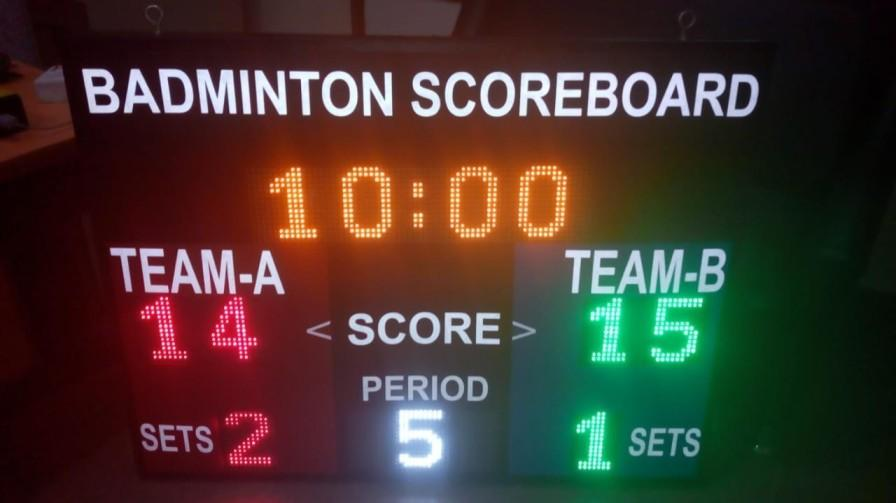

In [48]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


# file_path = r"images\\dog.jpg"
# file_path = r"images\\multiple-persons.jpg"
file_path = r"images\\multi-sports-score-board.jpg"


# Readin the image from path
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [52]:
llm_with_image_context = bakllava.bind(images=[image_b64])
llm_with_image_context.invoke("which game scoreboard is here ?")

' The image features a badminton scoreboard.'